<h1 style="text-align: center;">Working Time Series Data</h1>

<img src='../resources/time_series_animation.gif'/>

## What is Time Series Data?

A series of values of a quantity obtained at successive times, often with __equal intervals__ between them.

What are some examples?
- The temperature of July recorded daily
- The weekly average price of a stock in the past year 
- The average annual government budget in the past 30 years

We will put our focus on *univariate time series*, which records a single observation, or variable, at different but equal time intervals. 


Now that we know a little bit about time series data, what are some of the characteristics of it? The most notable characteristics in time series data are the patterns that could emerge, specifically, *trends* and *seasonality*. 
- Trend:
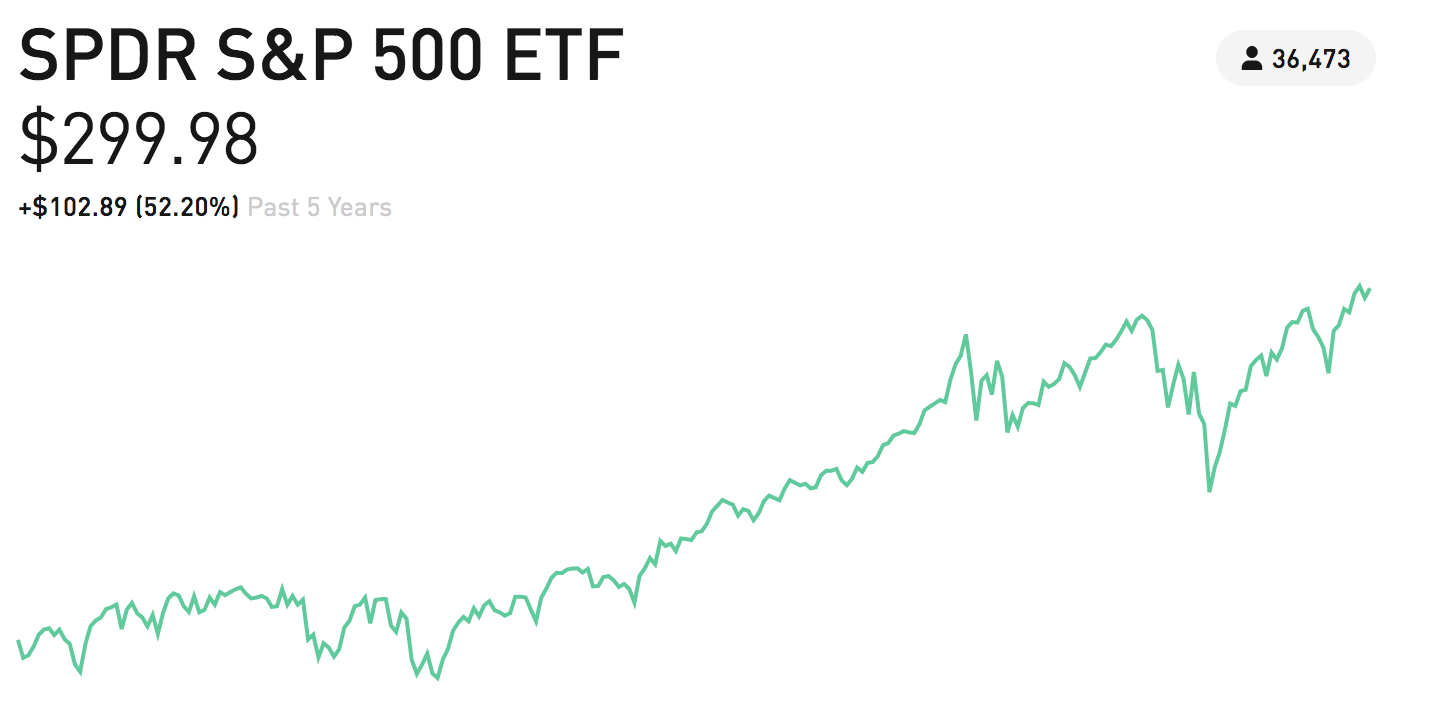

- Seasonality:
patterns that occur as a function of specific seasons. It is the variations that occur at specific regular intervals less than a year, such as quartly, hourly, or weekly. What are some examples that would manifest seasonal pattern?

An important pattern in time series that occur is __stationarity__, which is an assumption that lays the foundations for time series forecasting and modeling. 

## Stationarity 

#### What is stationary data? 

Stationary data is data in which summary statistics (mean, variance, covariance) are not a function of time

<h3 style="text-align: center;">Constant Mean</p>

<img src='../resources/mean_nonstationary.webp'/>

<h3 style="text-align: center;">Constant Variance</p>

<img src='../resources/variance_nonstationary.webp'/>

<h3 style="text-align: center;">Constant Covariance</p>

<img src='../resources/covariance_nonstationary.webp'/>

#### Why does data to be stationary for modeling? 

Stationarity is important because without it a model describing the data will vary in accuracy at different time points. 

Stationarity also lays the foundations of the typical time series models, such as AR, MA, ARMA. So a violation of stationarity can cause problem in prediction. 


### Testing Stationarity:
- Examining the visualization 
- Examining the summary statistics 
- The Dickey-Fuller Test

**0. Working with time series in Pandas**

Below we will load data from [Google Trends ](https://trends.google.com/trends/?geo=US) regarding the trending searches on Google for taxes.  

In [1]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-notebook')

# Load the data
taxes = pd.read_csv('../resources/google-trends_taxes_us.csv', header=[1])
taxes.head()

,Month,taxes: (United States)
0,2004-01,45
1,2004-02,54
2,2004-03,48
3,2004-04,56
4,2004-05,24


In [2]:
taxes.tail()

,Month,taxes: (United States)
180,2019-01,78
181,2019-02,100
182,2019-03,70
183,2019-04,81
184,2019-05,35


In [3]:
taxes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Month                   185 non-null    object
 1   taxes: (United States)  185 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.0+ KB


## 0. Time series in pandas

Pandas has robust tools for working with time series data.  By converting a column into one of Panda's time series types, you can do things like:

* downsample data with daily periods to monthly, yearly, etc.

* upsample it to hourly, minute-ly...down to nano-seconds.

* extract the month, year, day of the year, day of the week, etc.

Here is an exhaustive guide to using the datetime and timedelta (intervals of time) in pandas.

### [pandas datetime docs](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html)

In [4]:
taxes['Month'] = pd.to_datetime(taxes['Month'])
taxes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Month                   185 non-null    datetime64[ns]
 1   taxes: (United States)  185 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.0 KB


In [5]:
taxes.head()

,Month,taxes: (United States)
0,2004-01-01,45
1,2004-02-01,54
2,2004-03-01,48
3,2004-04-01,56
4,2004-05-01,24


Notice that pandas a accurately inferred the date from the string it was passed.  It has successfully inferred that the year is first, that the month is second, and defaulted to the first of the month for the day.  You can change how pandas represents the data to include hourse, minutes, seconds, etc or transform this date format into others.  See the link above to learn more advanced pandas datetime functionality

**Set the datetime column to the index**

Setting the datetime column to the index allows for even more functionality from pandas, though some model types require that the dates not be the index.  We will set it as the index for today.

In [6]:
taxes = taxes.set_index('Month')
taxes.head()

,taxes: (United States)
Month,
2004-01-01,45
2004-02-01,54
2004-03-01,48
2004-04-01,56
2004-05-01,24


## 1. Visually examining the data

<AxesSubplot:xlabel='Month'>

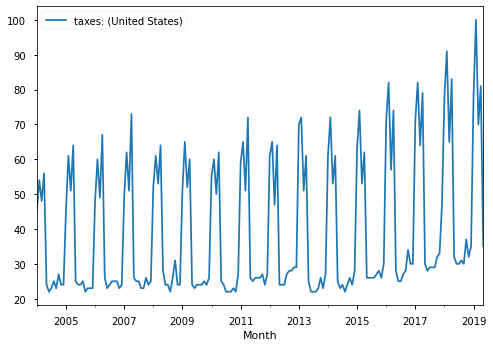

In [7]:
taxes.plot()

Now that we have the date as the index, we can easily see how searches for taxes trend over time.

In [8]:
#What do you notice about the data?  Type your answer below
#

*YOUR ANSWER HERE*

## 2. Examine summary statistics

In [9]:
# This code will return the means and variances in the first and seconds halves of the data.
X = taxes
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('first half mean=%f, \nsecond half mean=%f' % (mean1, mean2))
print('first half variance1=%f, \nsecond half variance2=%f' % (var1, var2))

first half mean=35.597826, 
second half mean=42.043011
first half variance1=261.715600, 
second half variance2=451.672043


**Notice that the data has a different mean and variance in the two partitions**

We can confirm that the mean and the variance are not constant in this dataset.

## 3.  Stationarity and the Dicky-Fuller Test

The Dickey Fuller Test is a statistical test for testing stationarity. The Null-hypothesis for the test is that the time series is not stationary. So if the test statistic is less than the critical value, we reject the null hypothesis and say that the series is stationary. The Dickey Fuller test is available in stattools from the StatsModels module. 

In [10]:
from statsmodels.tsa.stattools import adfuller

def dickey_fuller_test(data):
    results = adfuller(data)
    dicky_fuller = dict()
    keys = ['test statistic','pvalue','usedlag','number of observations','critical values','best information criterion']
    values = results
    for key, value in zip(keys, results):
        dicky_fuller[key] = value
    return dicky_fuller

In [11]:
dickey_fuller_test(taxes)

{'test statistic': 1.2523897616948834,
 'pvalue': 0.9963285924543993,
 'usedlag': 12,
 'number of observations': 172,
 'critical values': {'1%': -3.468952197801766,
  '5%': -2.878495056473015,
  '10%': -2.57580913601947},
 'best information criterion': 913.027773542055}

As you can see above, the test statistic is greater than any of the critical values and the p-value is higher than .05.  We cannot therefor reject the null hypothesis and our data is not stationary.  

There are some other values here that we will not discuss now, but that you can research on your own.

## Another way to visualize trends in a dataset is to plot the decomposition of the data

However, this should not replace the Dickey-Fuller test, as it is an approximate visual representation, not a rigorous statistical test.  This is just a way to get a feel for the trends and seasonality, and the residuals once those are removed.

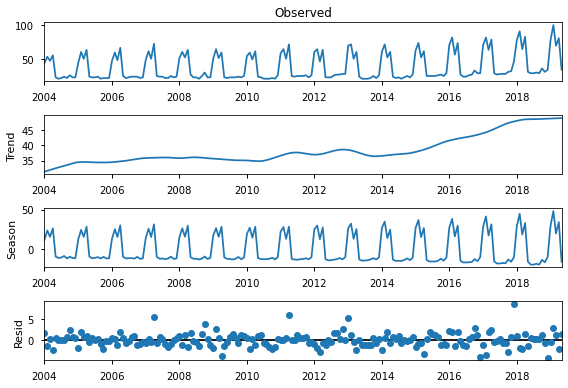

In [12]:
from statsmodels.tsa.seasonal import STL
stl = STL(taxes)
res = stl.fit()
fig = res.plot()


## 4. Make non-stationary data stationary

A series of steps can be taken to stationarize your data - also known -  as removing trends (linear trends, seasonaility/periodicity, etc - more details on transformations <a href='http://people.duke.edu/~rnau/whatuse.htm'>here</a>) - we do this by taking differences of the variable over time, log transforming, or seasonal differencing.

#### Some terminology:
- Lag: for some specific point t, the observed $X_{t-1}$ (i-th period back) is called the i-th lag of $X_t$

## Differencing

We use differencing to remove your data's dependence on time (temporal dependence). 

Differencing is performed by subtracting the previous observation (lag=1) from the current observation.

difference(t) = observation(t) - observation(t-1)

__Discussion question__:
If we have a time series dataset of [1,2,3,4,5,6,7,8,9,10], and we want to difference is by lag=1, what would the result be?

In [13]:
#### manually differencing a series!
taxes

,taxes: (United States)
Month,
2004-01-01,45
2004-02-01,54
2004-03-01,48
2004-04-01,56
2004-05-01,24
...,...
2019-01-01,78
2019-02-01,100
2019-03-01,70


In [14]:
# create a differenced series
import numpy as np

def difference(dataset, interval=1):
    diff = []
    arr = np.array(dataset).flatten()
    # subtract each value from the value 'interval' places before it.
    for i in range(interval, len(dataset)):
        value = arr[i] - arr[i - interval]
        diff.append(value)
    return pd.Series(diff)

diff = difference(taxes, interval=1)
diff

0       9
1      -6
2       8
3     -32
4      -2
       ..
179    43
180    22
181   -30
182    11
183   -46
Length: 184, dtype: int64

In [15]:
# Notice the length of the dataset has changed.  Why did this happen?  Type your answer below
#


*YOUR ANSWER HERE*

### Differencing using pandas

<AxesSubplot:xlabel='Month'>

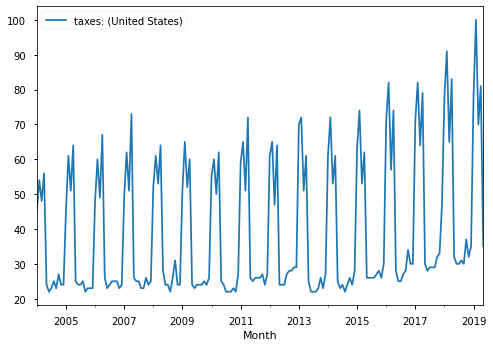

In [16]:
#plot of data to see visualize trends
taxes.plot()

In [17]:
#call .diff off a pandas/numpy series to get differenced values
diff = taxes.diff()
diff.head()

,taxes: (United States)
Month,
2004-01-01,NaN
2004-02-01,9.0
2004-03-01,-6.0
2004-04-01,8.0
2004-05-01,-32.0


<AxesSubplot:xlabel='Month'>

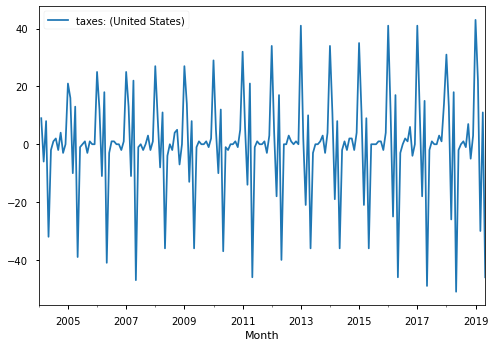

In [18]:
diff.plot()

In some cases, in order to remove a trend we will need to difference a time series more than once.  This is called higher order differencing.

<AxesSubplot:xlabel='Month'>

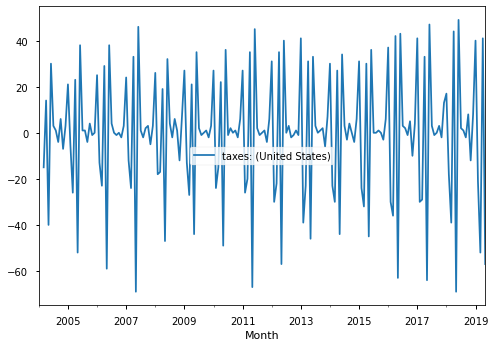

In [19]:
taxes.diff().diff().plot()

The default for df.diff() is an interval of one.  Each value is the difference between the original value and the value before it.  However, this is tunable.  Our data has a seasonality of 12 months, so let's try a df.diff(12), or a differencing over 12 lags.

This will subtract each value from the value 12 months before it and hopefully it will remove the seasonal trend.


<AxesSubplot:xlabel='Month'>

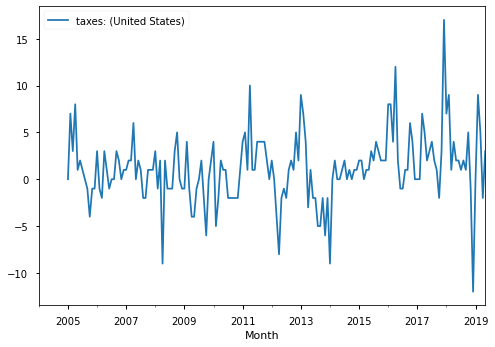

In [20]:
diff_year = taxes.diff(12)
diff_year.plot()

Sometimes, we have to difference the differenced data (known as a second difference) to achieve stationary data. <b>The number of times we have to difference our data is the order of differencing</b> - we will use this information when building our model.

One we have achieved stationarity the next step in fitting a model to address any autocorrelation that remains in the differenced series. Time series exhbit two kinds of behaviors. Often, you can predict a value in a time series using a past value or values. Othertimes, the past values can be misleading - consider the stock market - everyday stock prices experience shock due to randomness. The effect of that shock generally diminishes quickly and has little effect on future prices. Determining which behaviors are present in our time series is essential so we can properly model the behavior. 

<AxesSubplot:xlabel='Month'>

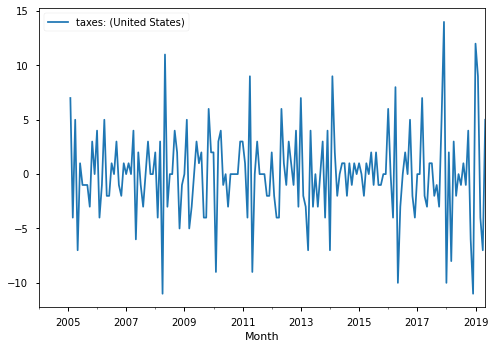

In [21]:
diff_year_2nd_order = taxes.diff(12).diff()
diff_year_2nd_order.plot()

#### Differencing is a powerful tool to make your data stationary, but is just one of several.

Others:

1. np.log() can remove linear trends
2. np.sqrt or np.cbrt() can also help with linear trends

## Logging Values

<AxesSubplot:xlabel='Month'>

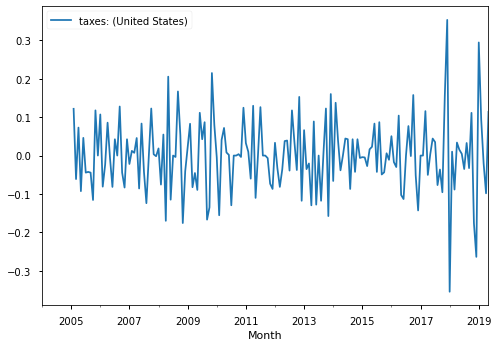

In [38]:
#Log data and then difference it by 12 lags, then difference it again.
log_diff_taxes = np.log(taxes).diff(12).diff()
log_diff_taxes.plot()

Notice that logging the data before differencing has helped to reduce the changing variance.  Let's run another Dickey-Fuller test to see if our transformations have helped.

**WARNING**
numpy will throw an error if you have zero values in your data when you use np.log(), as zero cannot be logged.  

## Subtracing the Rolling Mean or Rolling Standard Deviation

The final strategy we will look at for making our data stationary is to subtract the rolling mean and/or the rolling standard deviation.

A rolling mean is the average value of a window of values in the data.  For instance, if we used a window of 4, than each value in the rolling mean data is the average of the previous 4 values.  This is the same for rolling standard deviation.  

In timeseries data we will always use previous values to calculate the rolling mean and standard deviation.

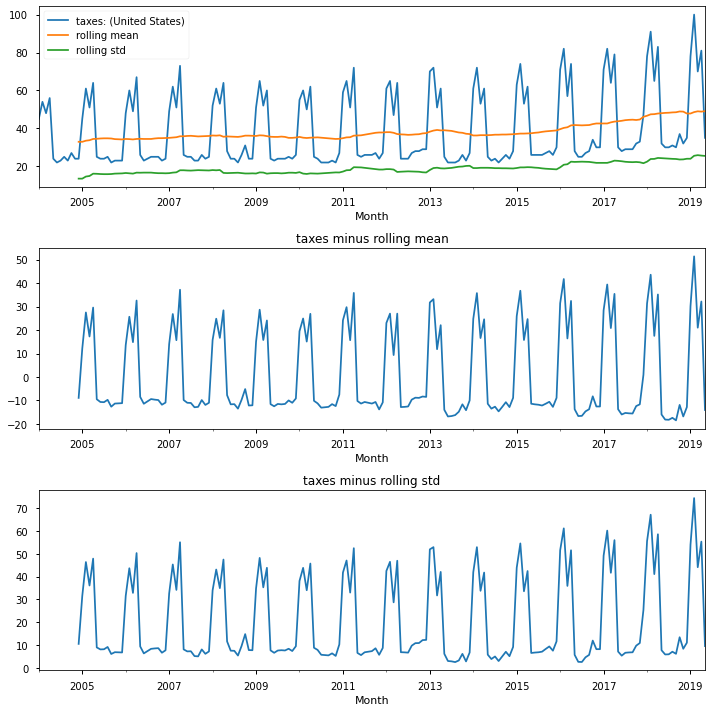

In [24]:
taxes_rolling_mean = taxes.rolling(window=12).mean()
taxes_rolling_std = taxes.rolling(window=12).std()
taxes_rolling_mean.columns = ['rolling mean']
taxes_rolling_std.columns = ['rolling std']
taxes_minus_rolling_mean = taxes.iloc[:,0] - taxes_rolling_mean.iloc[:,0]
taxes_minus_rolling_std = taxes.iloc[:,0] - taxes_rolling_std.iloc[:,0]

plt.figure(figsize=(10,10))

ax = plt.subplot(311)
ax2 = plt.subplot(312)
ax3 = plt.subplot(313)

taxes.plot(ax = ax)
taxes_rolling_mean.plot(ax=ax)
taxes_rolling_std.plot(ax=ax)
taxes_minus_rolling_mean.plot(ax=ax2, title='taxes minus rolling mean')
taxes_minus_rolling_std.plot(ax=ax3, title='taxes minus rolling std')
plt.tight_layout()

In this case, subtracting the rolling mean or rolling std, at least at a window of 12, did not help us much, or so it seems.  

**Notice** where the plot starts for the rolling statistics? The first 'window' number of values are NaN because they cannot be calculated.  There aren't enough values before them to use for the calculation!  When you create your model, you will need to drop those NaNs

In [39]:
#Test our data for stationarity again
#note that the Dicky-Fuller test cannot handle missing values.  Since we differenced by 12, then again by 1,
#the first 13 values in our data are NaNs.  We will drop those.
log_diff_taxes_no_na = log_diff_taxes.dropna()
dickey_fuller_test(log_diff_taxes_no_na)

{'test statistic': -7.131613588308018,
 'pvalue': 3.5058626891457557e-10,
 'usedlag': 13,
 'number of observations': 158,
 'critical values': {'1%': -3.4724305215713156,
  '5%': -2.8800127935315465,
  '10%': -2.576619230892485},
 'best information criterion': -358.5551732483167}

**Success!**

According to the Dicky-Fuller test we can now reject the null hypothesis and assert that our data is stationary with a high confidence.

## Note that we are using our original, non-stationary data below this point!

## 5. Autocorrelation

#### What is autocorrleation? 

It is the correlation between one time series and the same time series shifted by k periods. This is the way AR, or Auto-Regression models model timeseries data.  They ask, how can previous values be used to predict future values?  This is why we need to remove trends, because those defeat the ability of AR based models to use only the previous lags to predict future values.  

Notice that the transformations we used to make our data stationary be reversed when we report predictings from an AR based model to show true, untransformed predictions.

## Random Walk Model
The models below are examples of the simplest kinds of time series models, random walks.  These models assume that each value will be the same as the value before it (or k lags before it)

We get an Mean Squared Error of only 22 by assuming that each year's searches will be the same as the same month of the previous year.  However this is a very naive model, and AR can model more complex relationships between lags using regression.

In [26]:
taxes_sales_lag_1 = taxes.shift(periods=1)
taxes_sales_lag_2 = taxes.shift(periods=12)

**lag of one month**

MSE =  [297.94565217]


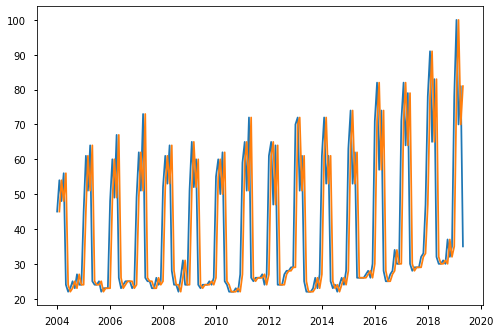

In [28]:
plt.plot(taxes)
plt.plot(taxes_sales_lag_1)
mse = ((taxes - taxes_sales_lag_1)**2).mean().values
print('MSE = ', mse)

**Lag of one year**

MSE =  [14.53179191]


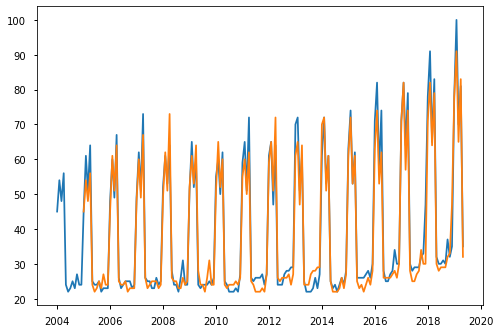

In [29]:
plt.plot(taxes)
plt.plot(taxes_sales_lag_2)
mse = ((taxes - taxes_sales_lag_2)**2).mean().values
print('MSE = ', mse)

### 6. Measuring the autocorrelation between lags

#### ACF

An ACF plot shows how each lag is correlated to previous lags.  In the plot_acf() function from statsmodels, the lines show the level of correlation previous lags on a given data point, and the blue shaded region represents statistically insignificant correlations.

Read it left to right with 0 being the lag you referenced and each x-tick to the right as the correlation of that lag on lag 0.  Of course every value is perfectly correlated with itself, so lag 0 will always be 1.

In [30]:
from statsmodels.graphics.tsaplots import plot_acf

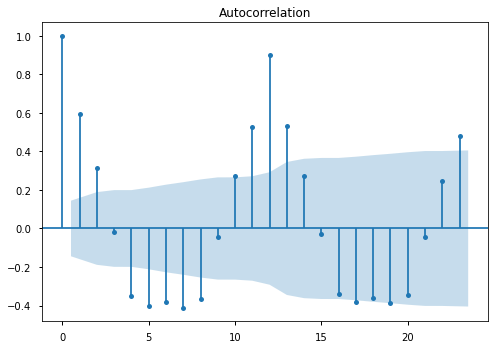

In [31]:
#plot autocorrelation for each lag (alpha is confidence interval)
import matplotlib.pyplot as plt
plot_acf(taxes[:-1], alpha=.05)
plt.show()

Looks like the first four lags have some pretty strong autocorrelation - note for future model building.

Sometimes, autocorrelation propogates down to other lags. The influence of a strong autocorrelation causes additional lags to highly autocorrelated. To discover the true relationship between lags we can use the PACF (partial autocorrelation function) 

In [32]:
#Why is there a large correlation at lag 12?  Write your answer below.
#(Remember we are using our original, non-stationary data in this graph)
#
#

*YOUR ANSWER HERE*

#### PACF

Partial autocorrelation looks at the correlation between a point and particular lag without the influence of itermediary lags. This helps us see the direct relationship between the values and each lags, without the influence of intervening lags. 

In [33]:
from statsmodels.graphics.tsaplots import plot_pacf

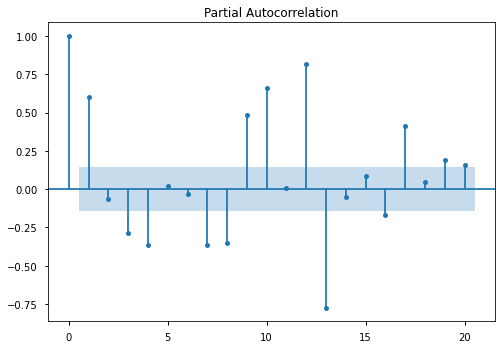

In [34]:
plot_pacf(taxes[:-1], alpha=.05, lags=20)
plt.show()

Now that we now how to analyze the patterns in our time series we can procede with creating models to create forecasts!


<b>Additional Resources</b>

https://www.youtube.com/watch?v=Prpu_U5tKkE

https://newonlinecourses.science.psu.edu/stat510/node/41/
